<a href="https://colab.research.google.com/github/zomorodiyan/qiskit_intro/blob/main/qiskit_gates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-4i97vhs0
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-4i97vhs0


In [ ]:
#import qiskit
#qiskit.__qiskit_version__

In [ ]:
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector

In [ ]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘

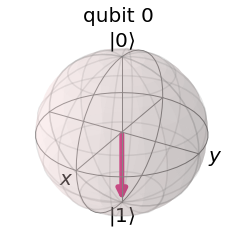

In [ ]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

In [ ]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [ ]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

 Digression: Measuring in Different Bases

In [ ]:
# Create the X-measurement function:
def x_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc
initial_state = [0,1]
# Initialise our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌─────────────────┐┌───┐┌─┐┌───┐
q_0: ┤ Initialize(0,1) ├┤ H ├┤M├┤ H ├
     └─────────────────┘└───┘└╥┘└───┘
c: 1/═════════════════════════╩══════
                              0

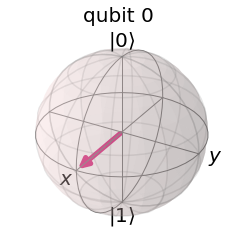

In [ ]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
out_state = execute(qc,backend).result().get_statevector() # Do the simulation, returning the state vector
plot_bloch_multivector(out_state) # Display the output state vector